readdone
readdone
readdone
readdone
readdone
readdone
readdone
readdone
readdone
readdone
readdone
readdone
readdone
readdone
readdone
readdone
readdone
readdone
readdone
readdone
readdone
readdone
readdone
readdone
readdone
readdone
readdone
readdone
readdone
readdone
66


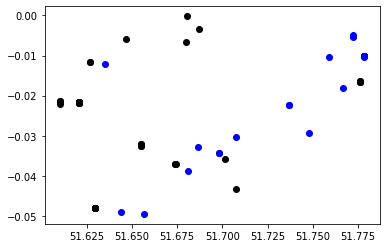

In [13]:
import process_json as pj

#must use relative path
#ipython's default path is different from python's
#要解决数据不均衡的问题：半夜比中午少
filename_night1 = "../201206_tweets/activities_201206100000_201206100010.json"
filename_night2 = "../201206_tweets/activities_201206100010_201206100020.json"
filename_night3 = "../201206_tweets/activities_201206100020_201206100030.json"
filename_night4 = "../201206_tweets/activities_201206100030_201206100040.json"
filename_night5 = "../201206_tweets/activities_201206100040_201206100050.json"
filename_night6 = "../201206_tweets/activities_201206100050_201206100100.json"
filename_night7 = "../201206_tweets/activities_201206100100_201206100110.json"
filename_night8 = "../201206_tweets/activities_201206100110_201206100120.json"
filename_night9 = "../201206_tweets/activities_201206100120_201206100130.json"
filename_night10 = "../201206_tweets/activities_201206100130_201206100140.json"
filename_night11 = "../201206_tweets/activities_201206100140_201206100150.json"
filename_night12 = "../201206_tweets/activities_201206100150_201206100200.json"
filename_night13 = "../201206_tweets/activities_201206100200_201206100210.json"
filename_night14 = "../201206_tweets/activities_201206100210_201206100220.json"
filename_night15 = "../201206_tweets/activities_201206100220_201206100230.json"
filename_night16 = "../201206_tweets/activities_201206100230_201206100240.json"
filename_night17 = "../201206_tweets/activities_201206100240_201206100250.json"
filename_night18 = "../201206_tweets/activities_201206100250_201206100300.json"

filename_day1 = "../201206_tweets/activities_201206101200_201206101210.json"
filename_day2 = "../201206_tweets/activities_201206101210_201206101220.json"
filename_day3 = "../201206_tweets/activities_201206101220_201206101230.json"
filename_day4 = "../201206_tweets/activities_201206101230_201206101240.json"
filename_day5 = "../201206_tweets/activities_201206101240_201206101250.json"
filename_day6 = "../201206_tweets/activities_201206101250_201206101300.json"
filename_day7 = "../201206_tweets/activities_201206101300_201206101310.json"
filename_day8 = "../201206_tweets/activities_201206101310_201206101320.json"
filename_day9 = "../201206_tweets/activities_201206101320_201206101330.json"
filename_day10 = "../201206_tweets/activities_201206101330_201206101340.json"
filename_day11 = "../201206_tweets/activities_201206101340_201206101350.json"
filename_day12 = "../201206_tweets/activities_201206101350_201206101400.json"
json_processor = pj.process_json()
papers_night = []
papers_night = json_processor.read_single_file(filename_night1,papers_night)
papers_night = json_processor.read_single_file(filename_night2,papers_night)
papers_night = json_processor.read_single_file(filename_night3,papers_night)
papers_night = json_processor.read_single_file(filename_night4,papers_night)
papers_night = json_processor.read_single_file(filename_night5,papers_night)
papers_night = json_processor.read_single_file(filename_night6,papers_night)
papers_night = json_processor.read_single_file(filename_night7,papers_night)
papers_night = json_processor.read_single_file(filename_night8,papers_night)
papers_night = json_processor.read_single_file(filename_night9,papers_night)
papers_night = json_processor.read_single_file(filename_night10,papers_night)
papers_night = json_processor.read_single_file(filename_night11,papers_night)
papers_night = json_processor.read_single_file(filename_night12,papers_night)
papers_night = json_processor.read_single_file(filename_night13,papers_night)
papers_night = json_processor.read_single_file(filename_night14,papers_night)
papers_night = json_processor.read_single_file(filename_night15,papers_night)
papers_night = json_processor.read_single_file(filename_night16,papers_night)
papers_night = json_processor.read_single_file(filename_night17,papers_night)
papers_night = json_processor.read_single_file(filename_night18,papers_night)
json_processor.draw_geo(papers_night)
papers_day = []
papers_day = json_processor.read_single_file(filename_day1,papers_day)
papers_day = json_processor.read_single_file(filename_day2,papers_day)
papers_day = json_processor.read_single_file(filename_day3,papers_day)
papers_day = json_processor.read_single_file(filename_day4,papers_day)
papers_day = json_processor.read_single_file(filename_day5,papers_day)
papers_day = json_processor.read_single_file(filename_day6,papers_day)
papers_day = json_processor.read_single_file(filename_day7,papers_day)
papers_day = json_processor.read_single_file(filename_day8,papers_day)
papers_day = json_processor.read_single_file(filename_day9,papers_day)
papers_day = json_processor.read_single_file(filename_day10,papers_day)
papers_day = json_processor.read_single_file(filename_day11,papers_day)
papers_day = json_processor.read_single_file(filename_day12,papers_day)
json_processor.draw_geo(papers_day)

papers = papers_day+papers_night
print(len(papers))

In [14]:
#creat dataset
from sklearn.preprocessing import minmax_scale,StandardScaler
import numpy as np
geos_day,geos_night,day_label,night_label = [],[],[],[]
for line in papers_day:
    geos_day.append(line["geo"]["coordinates"])
    day_label = day_label+[1]
for line in papers_night:
    geos_night.append(line["geo"]["coordinates"])
    night_label = night_label+[0]
    
geos_day = np.array(geos_day)
geos_night = np.array(geos_night)
day_label,night_label = np.row_stack(day_label),np.row_stack(night_label)
print(geos_day.shape)
print((geos_night.shape))

percent = 0.8
partition = int(geos_day.shape[0]*percent)
train_x_d, train_y_d, val_x_d, val_y_d = geos_day[:partition],day_label[:partition], geos_day[partition:], day_label[partition:]

percent = 0.8
partition = int(geos_night.shape[0]*percent)
train_x_n, train_y_n, val_x_n, val_y_n = geos_night[:partition],night_label[:partition], geos_night[partition:], night_label[partition:]

train_x = np.vstack((train_x_d,train_x_n))
train_y = np.vstack((train_y_d,train_y_n))
val_x = np.vstack((val_x_d,val_x_n))
val_y = np.vstack((val_y_d,val_y_n))

#归一化
#target must 0D or 1D
train_y = train_y.squeeze()
val_y = val_y.squeeze()
train_x = minmax_scale(train_x)
val_x = minmax_scale(val_x)
# print(train_x.shape,train_y.shape,val_x.shape,val_y.shape)
# print(val_x)

(24, 2)
(42, 2)


In [15]:
#creat dataset
import torch 
from torch.utils.data import Dataset

class GeoDataset(Dataset):
    #有可能一次处理一个trains[i]
    def __init__(self, X, y=None):
        self.data = torch.tensor(X)
        
        if y is not None:
            self.label=torch.tensor(y)
        else:
            self.label = None

    def __getitem__(self, idx):
        if self.label is not None:
            return self.data[idx], self.label[idx]
        else:
            return self.data[idx]

    def __len__(self):
        return len(self.data)

In [16]:
#dataset and dataloader

BATCH_SIZE = 16

from torch.utils.data import DataLoader

train_set = GeoDataset(train_x, train_y)
val_set = GeoDataset(val_x, val_y)
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True) #only shuffle the training data
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False)

In [17]:
#用 全连接神经网络 进行分辨
#目标：输出三色，白天和黑夜重合的部分输出绿色
# 首先要引入相关的包
import torch
# 引入torch.nn并指定别名
import torch.nn as nn
#打印一下版本
torch.__version__
import torch.nn.functional as F
class Classifier(nn.Module):
    def __init__(self):
        # nn.Module子类的函数必须在构造函数中执行父类的构造函数
        super(Classifier, self).__init__()
        self.fc1   = nn.Linear(2, 5)  
        self.fc2   = nn.Linear(5, 5)  
        self.fc3   = nn.Linear(5, 2)  
    #正向传播 
    def forward(self, x): 
        x = self.fc1(x) 
        x = F.leaky_relu(x)
        x = self.fc2(x) 
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.sigmoid(x) 
        return x

net = Classifier()
print(net)

#check device
def get_device():
  return 'cuda' if torch.cuda.is_available() else 'cpu'

# fix random seed
def same_seeds(seed):
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  
    np.random.seed(seed)  
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

Classifier(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=2, bias=True)
)


In [18]:
# Feel free to change the training parameters here.
# fix random seed for reproducibility
same_seeds(0)

# get device 
device = get_device()
print(f'DEVICE: {device}')

# training parameters
num_epoch = 20              # number of training epoch
learning_rate = 0.1      # learning rate

# the path where checkpoint saved
model_path = './model.ckpt'

# create model, define a loss function, and optimizer
model = Classifier().to(device)
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

DEVICE: cuda


In [19]:
# start training
#问题：交叉熵不要自己独热化，给0到n-1作为标签即可
# 为了解决：expected scalar type Float but found Double
model = model.double()
#可能是因为没有初始化？
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight,std=0.01)
model.apply(init_weights)

best_acc = 0.0
for epoch in range(num_epoch):
    train_acc = 0.0
    train_loss = 0.0
    val_acc = 0.0
    val_loss = 0.0

    # training
    model.train() # set the model to training mode
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # print(inputs),print(labels)
        optimizer.zero_grad() 
        outputs = model(inputs) 
        # print(f'Train:{outputs}')
        batch_loss = criterion(outputs, labels)
        _, train_pred = torch.max(outputs, 1) # get the index of the class with the highest probability
        # print(f'train:{train_pred}')
        batch_loss.backward() 
        optimizer.step() 
        
        # print(train_pred.cpu())
        train_acc += (train_pred.cpu() == labels.cpu()).sum().item()
        train_loss += batch_loss.item()

    # validation
    if len(val_set) > 0:
        model.eval() # set the model to evaluation mode
        with torch.no_grad():
            for i, data in enumerate(val_loader):
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                batch_loss = criterion(outputs, labels) 
                _, val_pred = torch.max(outputs, 1) 
            
                val_acc += (val_pred.cpu() == labels.cpu()).sum().item() # get the index of the class with the highest probability
                val_loss += batch_loss.item()

            print('[{:03d}/{:03d}] Train Acc: {:3.6f} Loss: {:3.6f} | Val Acc: {:3.6f} loss: {:3.6f}'.format(
                epoch + 1, num_epoch, train_acc/len(train_set), train_loss/len(train_loader), val_acc/len(val_set), val_loss/len(val_loader)
            ))

            # if the model improves, save a checkpoint at this epoch
            if val_acc > best_acc:
                best_acc = val_acc
                torch.save(model.state_dict(), model_path)
                print('saving model with acc {:.3f}'.format(best_acc/len(val_set)))
    else:
        print('[{:03d}/{:03d}] Train Acc: {:3.6f} Loss: {:3.6f}'.format(
            epoch + 1, num_epoch, train_acc/len(train_set), train_loss/len(train_loader)
        ))

# if not validating, save the last epoch
if len(val_set) == 0:
    torch.save(model.state_dict(), model_path)
    print('saving model at last epoch')

/home/lanpokn/.local/lib/python3.6/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[001/020] Train Acc: 0.365385 Loss: 0.705202 | Val Acc: 0.642857 loss: 0.680247
saving model with acc 0.643
[002/020] Train Acc: 0.634615 Loss: 0.691331 | Val Acc: 0.642857 loss: 0.671779
[003/020] Train Acc: 0.634615 Loss: 0.669462 | Val Acc: 0.642857 loss: 0.663830
[004/020] Train Acc: 0.634615 Loss: 0.646774 | Val Acc: 0.642857 loss: 0.645901
[005/020] Train Acc: 0.634615 Loss: 0.618602 | Val Acc: 0.642857 loss: 0.616921
[006/020] Train Acc: 0.634615 Loss: 0.615346 | Val Acc: 0.642857 loss: 0.573986
[007/020] Train Acc: 0.711538 Loss: 0.576228 | Val Acc: 0.928571 loss: 0.428578
saving model with acc 0.929
[008/020] Train Acc: 0.769231 Loss: 0.586884 | Val Acc: 0.928571 loss: 0.404261
[009/020] Train Acc: 0.769231 Loss: 0.590711 | Val Acc: 0.928571 loss: 0.409637
[010/020] Train Acc: 0.750000 Loss: 0.499999 | Val Acc: 0.928571 loss: 0.391807
[011/020] Train Acc: 0.750000 Loss: 0.517546 | Val Acc: 0.928571 loss: 0.390444
[012/020] Train Acc: 0.788462 Loss: 0.531784 | Val Acc: 0.785714